In [8]:
import xarray as xr
import pandas as pd
import numpy as np
import datetime
from dateutil import tz
import netCDF4
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from my_fun.create_date import create_date
from my_fun.nan_helper import nan_helper
from scipy.signal import savgol_filter
from my_fun.reverse_colourmap import reverse_colourmap
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs

In [9]:
filename_nc  = 'in/Peru_input_1.nc'
dir_graphics   = 'out'
name_fig     = 'MB_elv'

ds = xr.open_dataset(filename_nc)
ds

<xarray.Dataset>
Dimensions:     (lat: 70, lon: 82, time: 8760)
Coordinates:
  * lon         (lon) float64 -77.65 -77.65 -77.65 ... -77.61 -77.61 -77.61
  * lat         (lat) float64 -8.98 -8.979 -8.979 ... -8.949 -8.949 -8.948
  * time        (time) datetime64[ns] 2016-09-01 ... 2017-08-31T23:00:00
Data variables:
    HGT         (lat, lon) float32 ...
    ASPECT      (lat, lon) float32 ...
    SLOPE       (lat, lon) float32 ...
    MASK        (lat, lon) float32 ...
    ALBEDO_G    (lat, lon) float64 ...
    ALBEDO_ICE  (lat, lon) float64 ...
    SNOWHEIGHT  (lat, lon) float64 ...
    T2          (time, lat, lon) float64 ...
    RH2         (time, lat, lon) float64 ...
    U2          (time, lat, lon) float64 ...
    G           (time, lat, lon) float64 ...
    Gex         (time, lat, lon) float64 ...
    PRES        (time, lat, lon) float64 ...
    RRR         (time, lat, lon) float64 ...
    N           (time, lat, lon) float64 ...

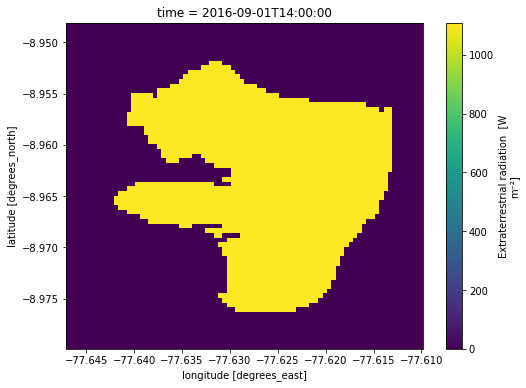

In [10]:
ds['Gex'][14].plot(figsize=(8,6))

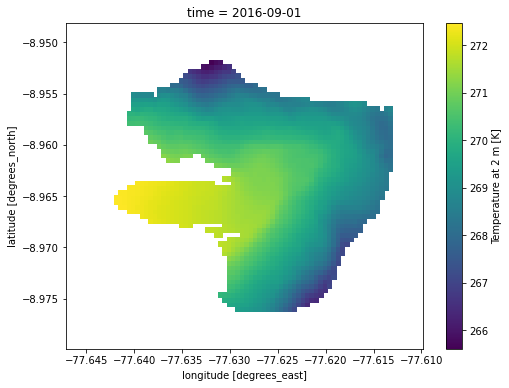

In [9]:
VAR = ds['T2'][0].where(ds['MASK']==1).plot(figsize=(8,6))

In [6]:
ds['ALBEDO_ICE'].where(ds['MASK']==1).min()

<xarray.DataArray 'ALBEDO_ICE' ()>
array(0.1)

In [7]:
ds['ALBEDO_ICE'].where(ds['MASK']==1).max()

<xarray.DataArray 'ALBEDO_ICE' ()>
array(0.32)

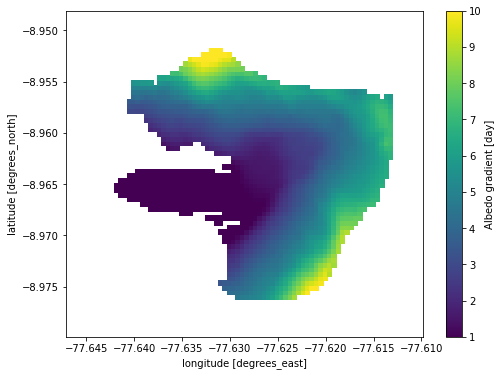

In [12]:
VAR = ds['ALBEDO_G'].where(ds['MASK']==1).plot(figsize=(8,6))
#VAR = VAR.where(VAR <= 10.0)#.plot(figsize=(8,6))
#VAR = VAR.where(VAR >= 2.0).plot(figsize=(8,6))

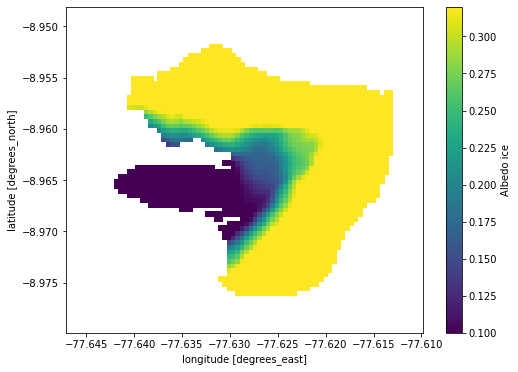

In [11]:
VAR = ds['ALBEDO_ICE'].where(ds['MASK']==1).plot(figsize=(8,6))

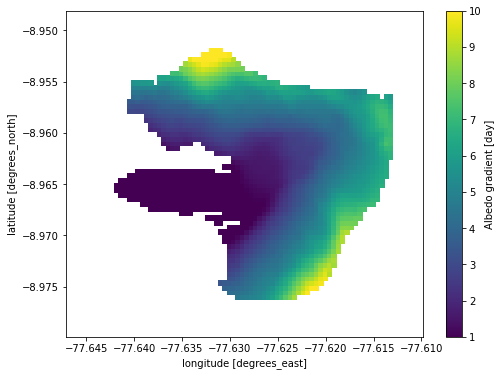

In [5]:
ds['ALBEDO_G'].where(ds['MASK']==1).plot(figsize=(8,6))

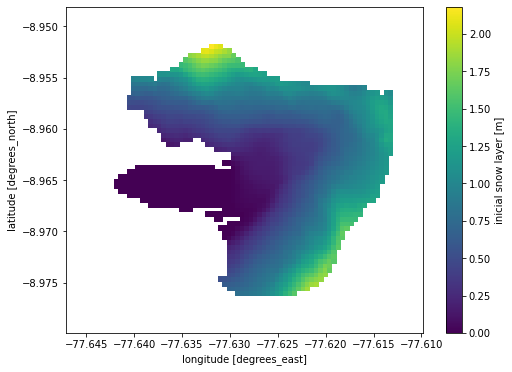

In [6]:
ds['SNOWHEIGHT'].where(ds['MASK']==1).plot(figsize=(8,6))

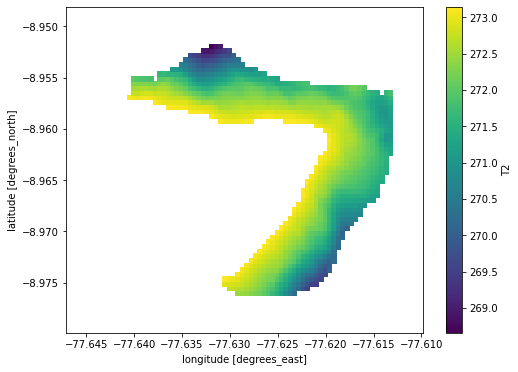

In [8]:
VAR = ds['T2'].mean('time').where(ds['MASK']==1)
VAR.where(VAR < 273.15).plot(figsize=(8,6))